# 🤖 QNN usando PennyLane e Keras

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
# Classifier Libraries
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pennylane as qml
from pennylane import numpy as np
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

## 🔁📊 Balancing the Dataset with SMOTE 🧪✨

In many real-world datasets, class imbalance can lead to biased models that favor the majority class.  
To tackle this issue, we use **SMOTE (Synthetic Minority Over-sampling Technique)** to artificially generate new instances of the minority class, improving the model's ability to learn from underrepresented data.
The following function applies SMOTE to a pandas DataFrame, increasing the minority class by a specified ratio.

In [4]:
from imblearn.over_sampling import SMOTE
import pandas as pd

from imblearn.over_sampling import SMOTE
import pandas as pd

def balance_with_smote(df, target_col='Class', smote_ratio=0.2, random_state=42):
    """Apply SMOTE to increase the minority class size by a specified ratio."""
    X = df.drop(columns=[target_col])
    y = df[target_col]

    # Apply SMOTE with a limited ratio
    smote = SMOTE(sampling_strategy=smote_ratio, random_state=random_state)
    X_resampled, y_resampled = smote.fit_resample(X, y)

    balanced_df = pd.DataFrame(X_resampled, columns=X.columns)
    balanced_df[target_col] = y_resampled
    return balanced_df

In [5]:
def count_fraud_percentage(df, fraud_col='isFraud'):
    """
    Calculate the count and percentage of fraud cases in a DataFrame.

    """

    fraud_count = df[fraud_col].sum()

    total_count = len(df)
    fraud_percentage = (fraud_count / total_count) * 100

    return fraud_count, fraud_percentage

## 🚀📥 Loading the Data

In [7]:
finance_df=pd.read_csv("dataset/fraud_detection_bank_dataset.csv",delimiter=',')
finance_df.describe()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,...,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,10233.500000,3.226256,294.793043,0.420021,2.329343,0.083594,0.939857,2.386066,3.226256,0.0,...,0.004935,0.358120,0.002443,0.308384,0.190737,0.000049,0.049345,0.024282,43.486125,0.265683
std,5908.746991,20.564308,717.541984,7.367275,10.068512,0.840537,4.222896,3.018140,20.564308,0.0,...,0.073478,0.479459,0.049366,0.461837,0.392892,0.006990,0.216593,0.305079,59.217560,0.441707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5116.750000,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,10233.500000,0.000000,97.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
75%,15350.250000,2.000000,283.000000,0.000000,2.000000,0.000000,1.000000,6.000000,2.000000,0.0,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,61.250000,1.000000
max,20467.000000,2301.000000,37808.000000,904.000000,772.000000,54.000000,230.000000,11.000000,2301.000000,0.0,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,747.000000,1.000000


In [8]:
df=finance_df
final_df=df
df

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,20463,0,88,0,0,0,2,-1,0,0,...,0,1,0,0,0,0,1,0,85,0
20464,20464,0,134,0,2,0,0,6,0,0,...,0,0,0,0,0,0,0,0,7,0
20465,20465,4,393,1,1,0,0,-1,4,0,...,0,1,0,0,0,0,0,0,45,0
20466,20466,0,10,0,1,0,0,-1,0,0,...,0,0,0,0,0,0,0,0,5,0


In [9]:
# Apply Min-Max Scaling to normalize all features in final_df between 0 and 1.
# This helps ensure that all features contribute equally to the model's performance.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
final_df[final_df.columns] = scaler.fit_transform(final_df[final_df.columns])
final_df

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0.000000,0.003911,0.035813,0.000000,0.023316,0.0,0.004348,0.666667,0.003911,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.065596,1.0
1,0.000049,0.000000,0.006321,0.000000,0.001295,0.0,0.004348,0.083333,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.073628,1.0
2,0.000098,0.000000,0.006877,0.000000,0.005181,0.0,0.013043,0.583333,0.000000,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.074967,1.0
3,0.000147,0.007388,0.018039,0.000000,0.001295,0.0,0.000000,0.750000,0.007388,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.087015,1.0
4,0.000195,0.000435,0.014283,0.000000,0.002591,0.0,0.004348,0.666667,0.000435,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.234270,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20463,0.999805,0.000000,0.002328,0.000000,0.000000,0.0,0.008696,0.000000,0.000000,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.113788,0.0
20464,0.999853,0.000000,0.003544,0.000000,0.002591,0.0,0.000000,0.583333,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009371,0.0
20465,0.999902,0.001738,0.010395,0.001106,0.001295,0.0,0.000000,0.000000,0.001738,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060241,0.0
20466,0.999951,0.000000,0.000264,0.000000,0.001295,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006693,0.0


In [10]:
y = df['targets']
X = df.drop(columns=['targets'])

In [11]:
#final_df.head()
print(type(X))
y.value_counts()

<class 'pandas.core.frame.DataFrame'>


0.0    15030
1.0     5438
Name: targets, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

# Split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [13]:
X_train.shape

(12280, 113)

In [14]:
y_train.value_counts()

0.0    8996
1.0    3284
Name: targets, dtype: int64

## 🧠⚛️ Creating a QNode

In [16]:
import pennylane as qml
import numpy as np
from itertools import combinations

n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)


def custom_layer(weights, n_qubits):
    index = 0  # Initialize index to track unique weights

    # Apply first set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply first set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply second set of RY gates
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1  # Increment index

    # Apply second set of CNOT gates
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply RY gates on qubit 3
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index
    qml.RY(weights[index], wires=3)
    index += 1  # Increment index

    # Apply nested RY gates for two layers
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1  # Increment index

    # Apply third set of CNOT gates
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Apply final set of RZ gates
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1  # Increment index

@qml.qnode(dev)
def qnode(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs


In [17]:
n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits+1)

def custom_layer_long(weights, n_qubits):
    index = 0  # Start index for weights

    # First block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # First set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Second block of RY
    for i in range(n_qubits + 1):
        qml.RY(weights[index], wires=i)
        index += 1

    # Second set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Third block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Nested loop of RY
    for j in range(2):
        for i in range(n_qubits):
            qml.RY(weights[index], wires=i)
            index += 1

    # Third set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # First block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Fourth set of CNOT pairs
    pairs = [(0, 2), (2, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Fourth block of RY (single qubit repeated)
    qml.RY(weights[index], wires=3)
    index += 1
    qml.RY(weights[index], wires=3)
    index += 1

    # Second block of RZ
    for i in range(n_qubits):
        qml.RZ(weights[index], wires=i)
        index += 1

    # Third block of RY
    for i in range(n_qubits):
        qml.RY(weights[index], wires=i)
        index += 1

    # Fifth set of CNOT pairs
    pairs = [(0, 1), (1, 2), (2, 3), (3, 0)]
    for pair in pairs:
        qml.CNOT(wires=pair)

    # Final block of RZ
    for i in range(n_qubits + 1):
        qml.RZ(weights[index], wires=i)
        index += 1

    return index  # Total number of indices used

@qml.qnode(dev)
def qnode_long(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer_long(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]
    return outputs

In [18]:
@qml.qnode(dev)
def qnode_long_solo(inputs, weights):
    qml.AngleEmbedding(inputs, wires=range(n_qubits+1))
    # print("AAAAAAAAAAAAAAAAAAAAA")
    # i=0
    for w in weights:
        # print(i)
        custom_layer_long(w,n_qubits)
        # i+=1
    outputs = [qml.expval(qml.PauliZ(wires=0)),qml.expval(qml.PauliZ(wires=1))]
    return outputs

Check now the Quantum Circuit: 

In [20]:
n_layers = 1
n_qubits=3
total_weights = 3 * (n_qubits + 1) + 2 * n_qubits + 2

weight_shapes = {"weights": (n_layers, total_weights+1)}

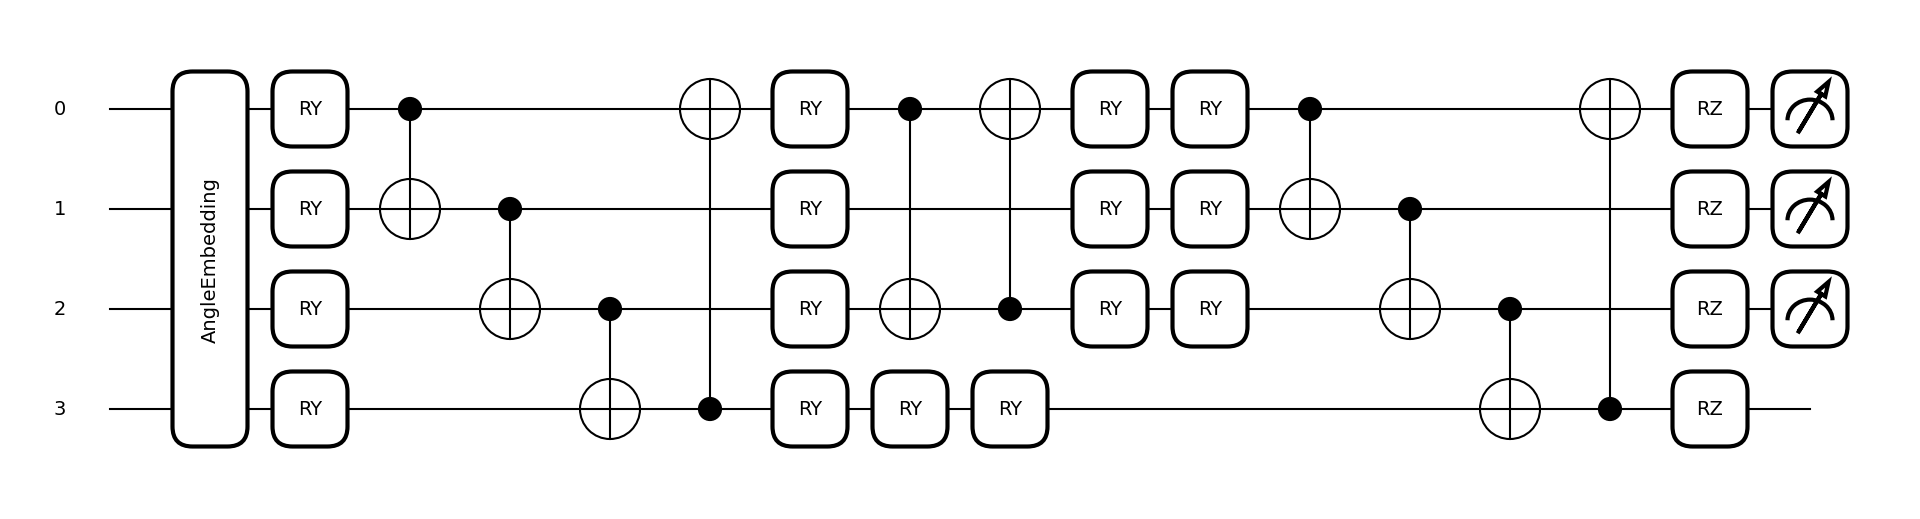

In [21]:
import pennylane as qml
import matplotlib.pyplot as plt

# Your existing code to define qnode, X, and weights goes here
weights = np.random.random(size=(n_layers, 32))
# Use draw_mpl to generate a graphical representation
fig, ax = qml.draw_mpl(qnode)(X.iloc[:, :4], weights)
plt.savefig("img/quantum_circuit_1.png", dpi=300, bbox_inches='tight')
plt.show()


In [22]:
weight_shapes

{'weights': (1, 21)}

In [23]:
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

## 🤖⚛️ Building the Hybrid Quantum-Classical Model 🧩

This section defines a hybrid neural network that combines classical dense layers with a quantum layer using PennyLane and Keras.  
The model leverages both classical and quantum computations to enhance learning performance on complex datasets.


In [25]:
n_inputs = X_train.shape[1]
qlayer = qml.qnn.KerasLayer(qnode, weight_shapes, output_dim=n_qubits)

Hybrid_Model = Sequential([
    Dense(n_inputs, activation=tf.nn.relu,
                       input_shape=(n_inputs,)),
    Dense(64,activation=tf.nn.relu),
    Dense(32, activation=tf.nn.relu),
    Dense(16, activation=tf.nn.relu),

    Dense(4, activation=tf.nn.relu),
    qlayer,
    Dense(2, activation=tf.nn.softmax)
])

Hybrid_Model.compile(optimizer=Adam(lr=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\jacop\anaconda3\envs\FraudDetection_QML\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [26]:
Hybrid_Model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
393/393 - 46s - loss: 0.4708 - accuracy: 0.8264 - val_loss: 0.1898 - val_accuracy: 0.9821 - 46s/epoch - 118ms/step
Epoch 2/20
393/393 - 46s - loss: 0.1172 - accuracy: 0.9865 - val_loss: 0.1161 - val_accuracy: 0.9723 - 46s/epoch - 118ms/step
Epoch 3/20
393/393 - 47s - loss: 0.0753 - accuracy: 0.9860 - val_loss: 0.0662 - val_accuracy: 0.9874 - 47s/epoch - 121ms/step
Epoch 4/20
393/393 - 47s - loss: 0.0529 - accuracy: 0.9893 - val_loss: 0.0461 - val_accuracy: 0.9923 - 47s/epoch - 118ms/step
Epoch 5/20
393/393 - 47s - loss: 0.0356 - accuracy: 0.9930 - val_loss: 0.0414 - val_accuracy: 0.9878 - 47s/epoch - 120ms/step
Epoch 6/20
393/393 - 50s - loss: 0.0283 - accuracy: 0.9939 - val_loss: 0.0694 - val_accuracy: 0.9788 - 50s/epoch - 128ms/step
Epoch 7/20
393/393 - 45s - loss: 0.0239 - accuracy: 0.9941 - val_loss: 0.0347 - val_accuracy: 0.9919 - 45s/epoch - 115ms/step
Epoch 8/20
393/393 - 44s - loss: 0.0226 - accuracy: 0.9945 - val_loss: 0.0440 - val_accuracy: 0.9886 - 44s/epoch - 111

In [27]:
y_pred = np.argmax(Hybrid_Model.predict(X_test), axis=-1)

128/128 [==============================] - 6s 47ms/step


In [28]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Display a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[3001   22]
 [  10 1061]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3023
         1.0       0.98      0.99      0.99      1071

    accuracy                           0.99      4094
   macro avg       0.99      0.99      0.99      4094
weighted avg       0.99      0.99      0.99      4094



## 🔍⚛️ Evaluating the Impact of the Quantum Model

To speed up execution and make quantum circuit runs more manageable,  
we reduced the size of the dataset. This allows us to efficiently observe how the quantum component influences the model’s performance.


In [30]:
from tensorflow.keras.layers import Dropout
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

In [31]:
n_layers = 1
n_qubits=3
total_weights_long = 32
print("Total weights required:", total_weights_long)

weight_shapes_long = {"weights": (n_layers, total_weights_long+1)}

Total weights required: 32


In [32]:
qlayer_long = qml.qnn.KerasLayer(qnode_long, weight_shapes_long, output_dim=n_qubits)

In [33]:
n_inputs = X_train.shape[1]

classic_model = Sequential([
    Dense(4, activation=tf.nn.relu),
    Dense(2, activation=tf.nn.softmax)
])

classic_model.compile(optimizer=Adam(lr=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
classic_model.fit(X_train, y_train, validation_split=0.2,batch_size=20,epochs=3,shuffle=True,verbose=2)

Epoch 1/3


C:\Users\jacop\anaconda3\envs\FraudDetection_QML\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


492/492 - 1s - loss: 0.1310 - accuracy: 0.9529 - val_loss: 0.0621 - val_accuracy: 0.9792 - 956ms/epoch - 2ms/step
Epoch 2/3
492/492 - 1s - loss: 0.0386 - accuracy: 0.9873 - val_loss: 0.0361 - val_accuracy: 0.9919 - 639ms/epoch - 1ms/step
Epoch 3/3
492/492 - 1s - loss: 0.0300 - accuracy: 0.9909 - val_loss: 0.0371 - val_accuracy: 0.9874 - 729ms/epoch - 1ms/step


In [34]:
y_pred = np.argmax(classic_model.predict(X_test), axis=-1)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Optional: Display a classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

128/128 [==============================] - 0s 676us/step
Confusion Matrix:
[[2998   25]
 [   7 1064]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      3023
         1.0       0.98      0.99      0.99      1071

    accuracy                           0.99      4094
   macro avg       0.99      0.99      0.99      4094
weighted avg       0.99      0.99      0.99      4094



Now focusing on the Quantum Part:

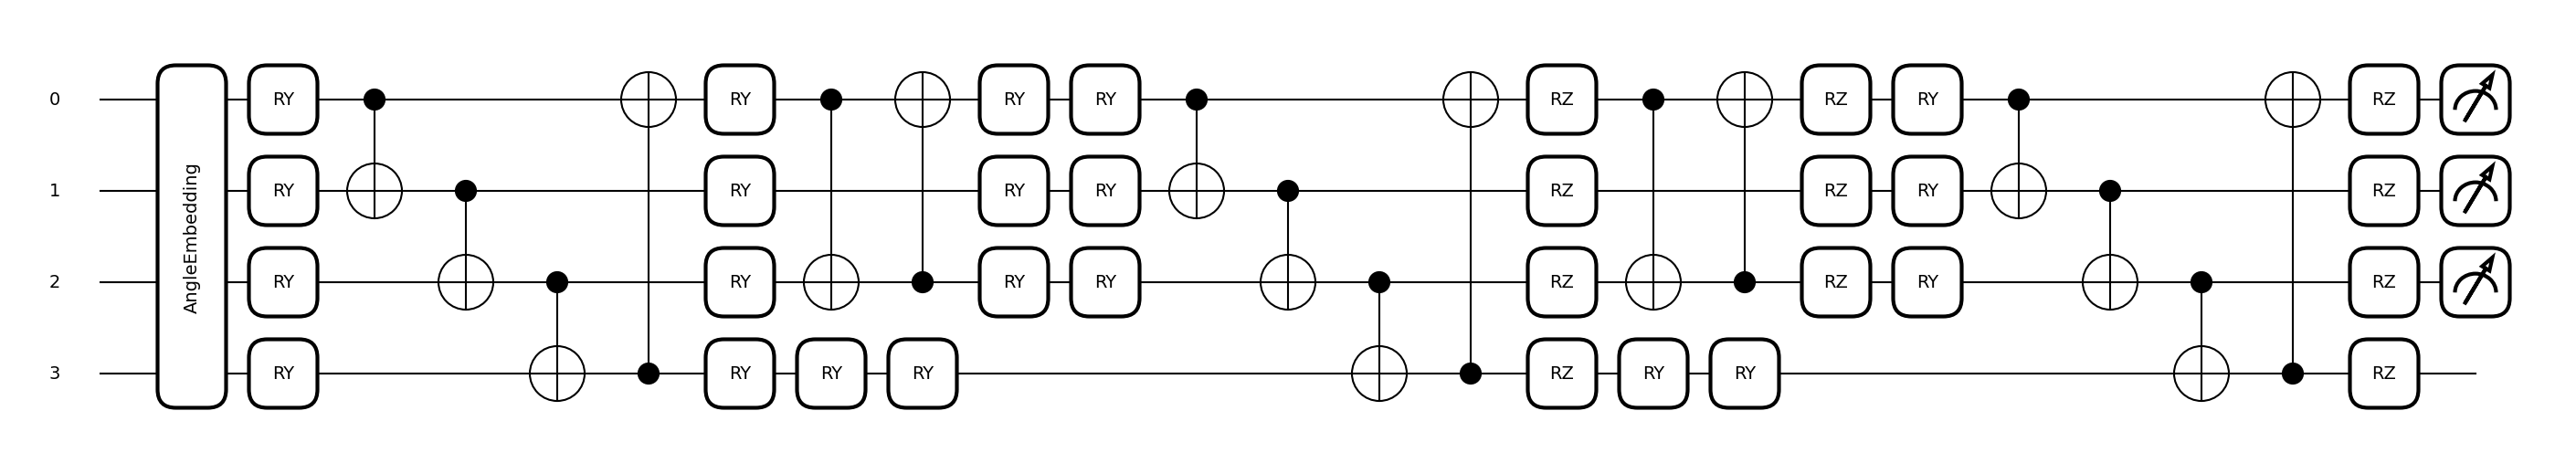

In [36]:
X_input = np.array(X_train)[:, :4]  # make sure it's 2D and sliced properly
fig, ax = qml.draw_mpl(qnode_long)(X_input, weights)
plt.savefig("img/quantum_circuit_2.png", dpi=300, bbox_inches='tight')

In [37]:
n_inputs = X_train.shape[1]

quantum_model = Sequential([
    Dense(4, activation=tf.nn.relu),
    qlayer_long,
    Dense(2, activation=tf.nn.softmax)
])

quantum_model.compile(optimizer=Adam(lr=0.01),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

quantum_model.fit(X_train, y_train, validation_split=0.2,batch_size=25,epochs=3,shuffle=True,verbose=2)

Epoch 1/3


C:\Users\jacop\anaconda3\envs\FraudDetection_QML\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


393/393 - 83s - loss: 0.1619 - accuracy: 0.9421 - val_loss: 0.0445 - val_accuracy: 0.9890 - 83s/epoch - 211ms/step
Epoch 2/3
393/393 - 78s - loss: 0.0391 - accuracy: 0.9887 - val_loss: 0.0313 - val_accuracy: 0.9906 - 78s/epoch - 197ms/step
Epoch 3/3
393/393 - 68s - loss: 0.0262 - accuracy: 0.9924 - val_loss: 0.0255 - val_accuracy: 0.9935 - 68s/epoch - 172ms/step


In [38]:
from sklearn.metrics import classification_report

y_pred = np.argmax(quantum_model.predict(X_test), axis=-1)
cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

128/128 [==============================] - 8s 66ms/step
Confusion Matrix:
[[3016    7]
 [  21 1050]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      3023
         1.0       0.99      0.98      0.99      1071

    accuracy                           0.99      4094
   macro avg       0.99      0.99      0.99      4094
weighted avg       0.99      0.99      0.99      4094



We can once again observe the positive impact and usefulness of the Quantum Layer within the Neural Network.  
Quantum states demonstrate a remarkable ability to represent complex patterns and correlations, potentially offering an advantage in learning tasks that are difficult for classical models alone.